<a href="https://colab.research.google.com/github/lenkalapellypraveen/DataScienceHub/blob/Dev/Weather_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Collection via API**

In [ ]:
import pandas as pd
from datetime import datetime
import requests
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
class Weather:
    def __init__(self, base_url, api_key, city_name, dt, end_dt):
        self.base_url = base_url
        self.api_key = api_key
        self.city_name = city_name
        self.strt_dt = dt
        self.end_dt = end_dt
        self.weather_data = None
        self.feels_like_temps = {}

    def fetch_weather_data(self):
        complete_url = f"{self.base_url}?key={self.api_key}&q={self.city_name}&dt={self.strt_dt}&end_dt={self.end_dt}"

        try:
            response = requests.get(complete_url)
            self.weather_data = response.json()

            print(f'weather_data: {self.weather_data}')

            return pd.DataFrame(self.weather_data)

        except requests.exceptions.RequestException as e:
            print("HTTP Request failed:", e)
            return pd.DataFrame()
        except Exception as e:
            print("An unexpected error occurred:", e)
            return pd.DataFrame()

    def plot_weather_data(self):
        plt.figure(figsize=(20, 5))
        for i in range(len(self.weather_data['forecast']['forecastday'])):
            plt.plot(self.weather_data['forecast']['forecastday'][i]['date'], self.weather_data['forecast']['forecastday'][i]['day']['maxtemp_f'], marker='D')
        plt.title('Temperature Trends')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°F)')
        plt.show()

    def find_target_variable(self):
        for i in range(len(self.weather_data['forecast']['forecastday'])):
            date = self.weather_data['forecast']['forecastday'][i]['date']
            daily_data = self.weather_data['forecast']['forecastday'][i]['day']
            temp = daily_data['avgtemp_f']
            wind_speed = daily_data['maxwind_mph']
            humidity = daily_data['avghumidity']

            feels_like = temp - 0.7 * wind_speed + 0.2 * humidity
            self.feels_like_temps[date] = feels_like

        for date, feels_like in self.feels_like_temps.items():
            print(f"On {date}, it will feel like {round(feels_like, 2)}°F")

    def model_building(self):
        X_data = []
        y_data = []

        for i in range(len(self.weather_data['forecast']['forecastday'])):
            daily_data = self.weather_data['forecast']['forecastday'][i]['day']
            temp = daily_data['avgtemp_f']
            wind_speed = daily_data['maxwind_mph']
            humidity = daily_data['avghumidity']
            X_data.append([temp, wind_speed, humidity])
            y_data.append(temp - 0.7 * wind_speed + 0.2 * humidity)

        model = LinearRegression()
        model.fit(X_data, y_data)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

        # Initialize and train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse}")

        return model

In [ ]:
api_key = "d327dceec5d64e8eaaf32339242712"
base_url = "http://api.weatherapi.com/v1/history.json"
city_name = "Boca Raton"
dt="2025-01-10"
end_dt="2025-01-30"
weather_df_obj = Weather(base_url, api_key, city_name, dt, end_dt)
weather_df = weather_df_obj.fetch_weather_data()

weather_data: {'error': {'code': 1008, 'message': 'API key is limited to get history data. Please check our pricing page and upgrade to higher plan.'}}


**2. Exploratory Data Analysis (EDA)**

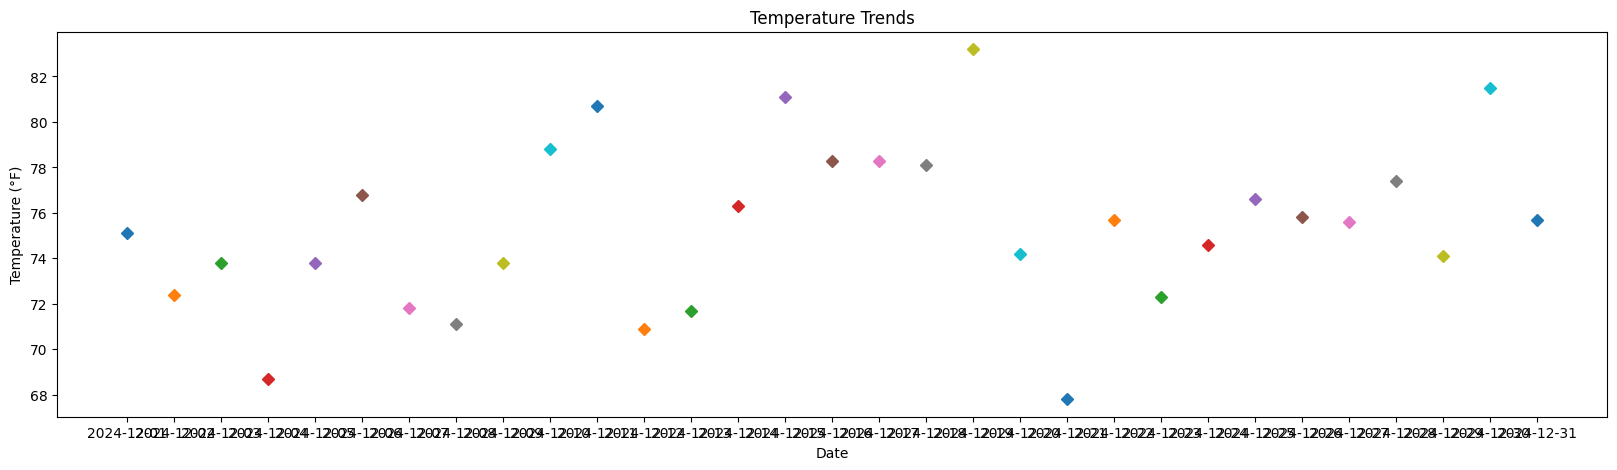

In [ ]:
if weather_df is not None and not weather_df.empty:
    weather_df_obj.plot_weather_data()
else:
    print("No weather data available for plotting.")

**3. Finding target variable**

In [ ]:
weather_df_obj.find_target_variable()

On 2024-12-01, it will feel like 78.95°F
On 2024-12-02, it will feel like 70.17°F
On 2024-12-03, it will feel like 65.66°F
On 2024-12-04, it will feel like 69.39°F
On 2024-12-05, it will feel like 78.66°F
On 2024-12-06, it will feel like 74.89°F
On 2024-12-07, it will feel like 75.62°F
On 2024-12-08, it will feel like 73.87°F
On 2024-12-09, it will feel like 78.53°F
On 2024-12-10, it will feel like 80.1°F
On 2024-12-11, it will feel like 78.57°F
On 2024-12-12, it will feel like 68.62°F
On 2024-12-13, it will feel like 71.29°F
On 2024-12-14, it will feel like 71.91°F
On 2024-12-15, it will feel like 75.54°F
On 2024-12-16, it will feel like 77.67°F
On 2024-12-17, it will feel like 79.91°F
On 2024-12-18, it will feel like 81.6°F
On 2024-12-19, it will feel like 88.34°F
On 2024-12-20, it will feel like 74.28°F
On 2024-12-21, it will feel like 66.24°F
On 2024-12-22, it will feel like 71.67°F
On 2024-12-23, it will feel like 76.18°F
On 2024-12-24, it will feel like 79.29°F
On 2024-12-25, it 

**5. Model Building**

In [ ]:
model = weather_df_obj.model_building()

Mean Squared Error: 1.442488512404136e-28


In [ ]:
# Finding Model Coefficients
print("Model Coefficients:", model.coef_)

Model Coefficients: [ 1.  -0.7  0.2]


**6. Making Predictions**

In [ ]:
# Predicting with hypothetical future data
future_data = pd.DataFrame({
    'avgtemp_f': [84],
    'maxwind_mph': [6],
    'avghumidity': [45]

})

future_temps = model.predict(future_data)
print(f"Predicted max temperature for future date: {future_temps}")

Predicted max temperature for future date: [88.8]
